## Exploratory Analysis

In [1]:
import sqlite3
import pandas as pd
import csv

pd.set_option('max_columns', 180)
pd.set_option('max_rows', 200000)
pd.set_option('max_colwidth', 5000)

In [2]:
game = pd.read_csv('game_log.csv', low_memory=False)
print(game.shape)
game.head(10)

(171907, 161)


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,NaN,1,FW1,NaN,1,0,2,54.0,D,NaN,NaN,NaN,FOR01,200.0,120.0,000000000,010010000,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,6.0,1.0,NaN,-1.0,NaN,4.0,1.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,3.0,0.0,0.0,31.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,-1.0,NaN,3.0,1.0,0.0,0.0,0.0,0.0,27.0,3.0,3.0,1.0,1.0,0.0,boakj901,John Boake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,paboc101,Charlie Pabor,lennb101,Bill Lennon,mathb101,Bobby Mathews,prata101,Al Pratt,NaN,NaN,NaN,NaN,prata101,Al Pratt,mathb101,Bobby Mathews,whitd102,Deacon White,2.0,kimbg101,Gene Kimball,4.0,paboc101,Charlie Pabor,7.0,allia101,Art Allison,8.0,white104,Elmer White,9.0,prata101,Al Pratt,1.0,sutte101,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,selmf101,Frank Sellman,5.0,mathb101,Bobby Mathews,1.0,foraj101,Jim Foran,3.0,goldw101,Wally Goldsmith,6.0,lennb101,Bill Lennon,2.0,caret101,Tom Carey,4.0,mince101,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,NaN,1,WS3,NaN,1,20,18,54.0,D,NaN,NaN,NaN,WAS01,5000.0,145.0,107000435,640113030,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0.0,18.0,NaN,5.0,3.0,NaN,-1.0,NaN,12.0,1.0,6.0,6.0,1.0,0.0,27.0,13.0,10.0,1.0,2.0,0.0,49.0,14.0,2.0,0.0,0.0,11.0,0.0,0.0,0.0,10.0,NaN,2.0,1.0,NaN,-1.0,NaN,14.0,1.0,7.0,7.0,0.0,0.0,27.0,20.0,10.0,2.0,3.0,0.0,dobsh901,Henry Dobson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wrigh101,Harry Wright,younn801,Nick Young,spala101,Al Spalding,braia102,Asa Brainard,NaN,NaN,NaN,NaN,spala101,Al Spalding,braia102,Asa Brainard,wrigg101,George Wright,6.0,barnr102,Ross

In [3]:
game.tail()

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
171902,20161002,0,Sun,MIL,NL,162,COL,NL,162,6,4,60.0,D,NaN,NaN,NaN,DEN02,27762.0,203.0,0200000202,1100100010,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0,1.0,4.0,0.0,12.0,2.0,1.0,0.0,0.0,8.0,7.0,4.0,4.0,1.0,0.0,30.0,12.0,1.0,0.0,0.0,0.0,41.0,13.0,4.0,0.0,1.0,4.0,1.0,0.0,1.0,3.0,0.0,11.0,0.0,1.0,0.0,0.0,12.0,5.0,6.0,6.0,0.0,0.0,30.0,13.0,0.0,0.0,0.0,0.0,barrs901,Scott Barry,woodt901,Tom Woodring,randt901,Tony Randazzo,ortir901,Roberto Ortiz,NaN,NaN,NaN,NaN,counc001,Craig Counsell,weisw001,Walt Weiss,thort001,Tyler Thornburg,rusic001,Chris Rusin,knebc001,Corey Knebel,susaa001,Andrew Susac,cravt001,Tyler Cravy,marqg001,German Marquez,villj001,Jonathan Villar,5.0,genns001,Scooter Gennett,4.0,cartc002,Chris Carter,3.0,santd002,Domingo Santana,9.0,pereh001,Hernan Perez,8.0,arcio002,Orlando Arcia,6.0,susaa001,Andrew Susac,2.0,elmoj001,Jake Elmore,7.0,cravt001,Tyler Cravy,1.0,blacc001,Charlie Blackmon,8.0,dahld001,David Dahl,7.0,arenn001,Nolan Arenado,5.0,gonzc001,Carlos Gonzalez,9.0,murpt002,Tom Murphy,2.0,pattj005,Jordan Patterson,3.0,valap001,Pat Valaika,4.0,adamc001,Cristhian Adames,6.0,marqg001,German Marquez,1.0,NaN,Y
171903,20161002,0,Sun,NYN,NL,162,PHI,NL,162,2,5,51.0,D,NaN,NaN,NaN,PHI13,36935.0,159.0,000001100,00100031x,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,9.0,1.0,1.0,1.0,0.0,6.0,6.0,3.0,3.0,0.0,0.0,24.0,12.0,3.0,1.0,2.0,0.0,33.0,10.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,2.0,0.0,7.0,5.0,2.0,2.0,0.0,0.0,27.0,7.0,0.0,0.0,1.0,0.0,barkl901,Lance Barksdale,herna901,Angel Hernandez,barrt901,Ted Barrett,littw901,Will Little,NaN,NaN,NaN,NaN,collt801,Terr

The game_log file contains gameday statistics for the park and both teams, offensive and defensive statistics, and ID information for players and umpires. 

There is also <b> defensive position </b> data; (1-9) representing the following:

1. Pitcher
2. Catcher
3. First base
4. Second base
5. Third base
5. Shortstop
5. Left field
5. Center field
6. Right field

In [4]:
park = pd.read_csv('park_codes.csv')
print(park.shape)
park.head()

(252, 9)


,park_id,name,aka,city,state,start,end,league,notes
0,ALB01,Riverside Park,NaN,Albany,NY,09/11/1880,05/30/1882,NL,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,NaN,Altoona,PA,04/30/1884,05/31/1884,UA,NaN
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,04/19/1966,NaN,AL,NaN
3,ARL01,Arlington Stadium,NaN,Arlington,TX,04/21/1972,10/03/1993,AL,NaN
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,04/11/1994,NaN,AL,NaN


In [5]:
park.tail()

,park_id,name,aka,city,state,start,end,league,notes
247,WIL02,BB&T Ballpark at Bowman Field,NaN,Wiliamsport,PA,08/20/2017,08/20/2017,NL,PIT
248,WNY01,West New York Field Club Grounds,NaN,West New York,NJ,09/11/1898,09/17/1899,NL,"BRO:9/18&10/2/1898; NY1:9/11/98, 6/4&7/16&8/13&9/17/99"
249,WOR01,Agricultural County Fair Grounds I,NaN,Worcester,MA,05/01/1880,09/29/1882,NL,NaN
250,WOR02,Agricultural County Fair Grounds II,NaN,Worcester,MA,08/17/1887,08/17/1887,NL,1 BSN game
251,WOR03,Worcester Driving Park Grounds,NaN,Worcester,MA,10/30/1874,10/30/1874,NaN,1 BS1 game


The park_codes contains location data for each stadium. There is also league data as well as some historical notes.

In [6]:
person = pd.read_csv('person_codes.csv')
print(person.shape)
person.head()

(20494, 7)


,id,last,first,player_debut,mgr_debut,coach_debut,ump_debut
0,aardd001,Aardsma,David,04/06/2004,NaN,NaN,NaN
1,aaroh101,Aaron,Hank,04/13/1954,NaN,NaN,NaN
2,aarot101,Aaron,Tommie,04/10/1962,NaN,04/06/1979,NaN
3,aased001,Aase,Don,07/26/1977,NaN,NaN,NaN
4,abada001,Abad,Andy,09/10/2001,NaN,NaN,NaN


In [7]:
person.tail()

,id,last,first,player_debut,mgr_debut,coach_debut,ump_debut
20489,zuvep001,Zuvella,Paul,09/04/1982,NaN,04/02/1996,NaN
20490,zuveg101,Zuverink,George,04/21/1951,NaN,NaN,NaN
20491,zwild101,Zwilling,Dutch,08/14/1910,NaN,04/15/1941,NaN
20492,zycht001,Zych,Tony,09/04/2015,NaN,NaN,NaN
20493,thoma102,Thompson,NaN,NaN,NaN,NaN,NaN


The person_codes data set contains dates for each player debut and when they were promoted to manager, coach, or umpire.

In [8]:
team = pd.read_csv('team_codes.csv')
print(team.shape)
team.head()

(150, 8)


,team_id,league,start,end,city,nickname,franch_id,seq
0,ALT,UA,1884,1884,Altoona,Mountain Cities,ALT,1
1,ARI,NL,1998,0,Arizona,Diamondbacks,ARI,1
2,BFN,NL,1879,1885,Buffalo,Bisons,BFN,1
3,BFP,PL,1890,1890,Buffalo,Bisons,BFP,1
4,BL1,NaN,1872,1874,Baltimore,Canaries,BL1,1


In [9]:
team['league'].value_counts()

NL    45
AL    25
AA    24
UA    13
FL     9
PL     8
Name: league, dtype: int64

The team_codes data contains start and end dates for each team, league and franchise associations, as well as home city.

Franchise data is historical where certain leagues began and started, staggered, dating back as early as 1876. The leagues (shown below) are codes for the following, respectively:

-  National League
-  American League
-  American Association
-  Union Association
-  Federal League
-  Player's League

The approximate date ranges for each league are shown below:

In [10]:
for i in range(len(team['league'].value_counts())):
    team_league = team[team['league'] == team['league'].value_counts().index[i]]
    earliest = team_league['start'].min()
    latest = team_league['end'].max()
    print(team['league'].value_counts().index[i], ': ', earliest, ' - ', latest )

NL :  1876  -  2011
AL :  1901  -  1997
AA :  1882  -  1891
UA :  1884  -  1884
FL :  1914  -  1915
PL :  1890  -  1890


## Importing to SQLite

In [11]:
DB = "mlb.db"

def run_query(q):
    with sqlite3.connect(DB) as conn:
        return pd.read_sql(q,conn)

def run_command(c):
    with sqlite3.connect(DB) as conn:
        conn.execute('PRAGMA foreign_keys = ON;')
        conn.isolation_level = None
        conn.execute(c)

def show_tables():
    q = '''
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type IN ("table","view");
    '''
    return run_query(q)

In [12]:
tables = {
    "game_log": game,
    "person_codes": person,
    "team_codes": team,
    "park_codes": park
}

with sqlite3.connect('mlb.db') as conn:    
    for name, data in tables.items():
        conn.execute('DROP TABLE IF EXISTS {};'.format(name))
        data.to_sql(name, conn, index=False)

In [13]:
show_tables()

,name,type
0,person,table
1,person_codes,table
2,park_codes,table
3,team_codes,table
4,game_log,table


In [23]:
c1 = '''
ALTER TABLE game_log
ADD COLUMN game_id TEXT;
'''

# try/except loop since ALTER TABLE
# doesn't support IF NOT EXISTS
try:
    run_command(c1)
except:
    pass

c2 = '''
UPDATE game_log
SET game_id = date || h_name || number_of_game
/* WHERE prevents this if it has already been done */
WHERE game_id IS NULL; 
'''
try:
    run_command(c2)
except:
    pass

q = '''
SELECT
    game_id,
    date,
    h_name,
    number_of_game
FROM game_log
LIMIT 5;
'''

run_query(q)

,game_id,date,h_name,number_of_game
0,18710504FW10,18710504,FW1,0
1,18710505WS30,18710505,WS3,0
2,18710506RC10,18710506,RC1,0
3,18710508CH10,18710508,CH1,0
4,18710509TRO0,18710509,TRO,0


## Data Normalization

- The game_log file may be split out into two or three columns which track defensive and offensive game statistics.
- day_of_week field could be derrived from the date information, however we may prefer a quick reference for game-day purposes. Otherwise, this field can be removed to prevent redundancy.
- Umpire and player names can be referenced in their own dataframe.
- In the park database, both the start and end dates can be removed as they can be referenced in game_log.
- In the person database, player debut could also be derrived from game_log.

## Planning 

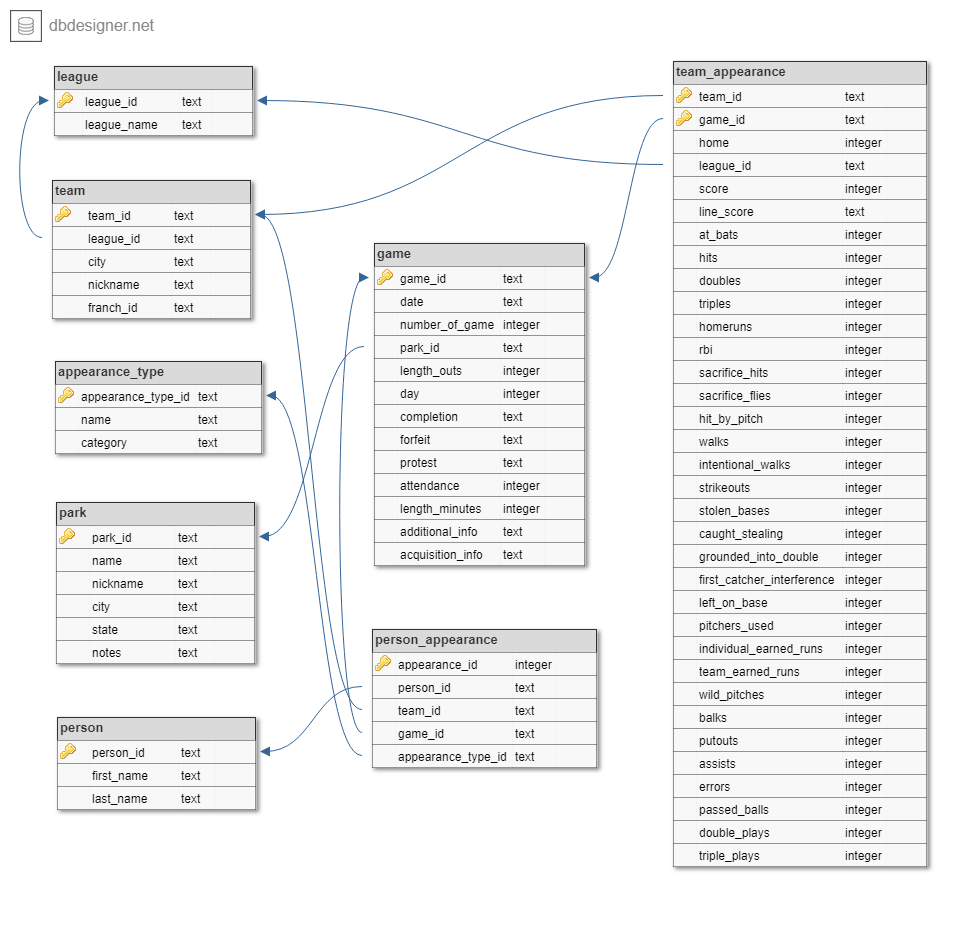

In [17]:
from IPython.display import Image
Image(filename="image.png")

## Creating Tables With No Foreign Keys

In [18]:
c1 = """
CREATE TABLE IF NOT EXISTS person (
    person_id TEXT PRIMARY KEY,
    first_name TEXT,
    last_name TEXT
);
"""

c2 = """
INSERT OR IGNORE INTO person
SELECT
    id,
    first,
    last
FROM person_codes;
"""

q = """
SELECT * FROM person
LIMIT 5;
"""

run_command(c1)
try:
    run_command(c2)
except:
    pass
run_query(q)

,person_id,first_name,last_name
0,aardd001,David,Aardsma
1,aaroh101,Hank,Aaron
2,aarot101,Tommie,Aaron
3,aased001,Don,Aase
4,abada001,Andy,Abad


In [20]:
c1 = '''
CREATE TABLE IF NOT EXISTS park (
    park_id TEXT PRIMARY KEY,
    name TEXT,
    nickname TEXT,
    city TEXT,
    state TEXT,
    notes TEXT
);
'''

c2 = '''
INSERT OR IGNORE INTO park
SELECT
    park_id,
    name,
    aka,
    city,
    state,
    notes
FROM park_codes;
'''

q1 = '''
SELECT * FROM park
LIMIT 5
'''

run_command(c1)
run_command(c2)
run_query(q1)

,park_id,name,nickname,city,state,notes
0,ALB01,Riverside Park,None,Albany,NY,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,None,Altoona,PA,None
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,None
3,ARL01,Arlington Stadium,None,Arlington,TX,None
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,None


In [25]:
c1 = '''
CREATE TABLE IF NOT EXISTS league (
    league_id TEXT PRIMARY KEY,
    name TEXT
);
'''

c2 = '''
INSERT OR IGNORE INTO league
VALUES
    ('NL', 'National League'),
    ('AL', 'American League'),
    ('AA', 'American Association'),
    ('UA', 'Union Association'),
    ('FL', 'Federal League'),
    ("PL", "Player's League");
'''

q1 = '''
SELECT * FROM league
'''

run_command(c1)
run_command(c2)
run_query(q1)

,league_id,name
0,NL,National League
1,AL,American League
2,AA,American Association
3,UA,Union Association
4,FL,Federal League
5,PL,Player's League


In [29]:
c1 = '''
CREATE TABLE IF NOT EXISTS appearance_type (
    appearance_type_id TEXT PRIMARY KEY,
    name TEXT,
    category TEXT
);
'''

appearance_type = pd.read_csv('appearance_type.csv')

with sqlite3.connect('mlb.db') as conn:
    appearance_type.to_sql('appearance_type', conn, index=False, if_exists='append')
    
q1 = '''
SELECT * FROM appearance_type
LIMIT 30;
'''

run_command(c1)
run_query(q1)

,appearance_type_id,name,category
0,O1,Batter 1,offense
1,O2,Batter 2,offense
2,O3,Batter 3,offense
3,O4,Batter 4,offense
4,O5,Batter 5,offense
5,O6,Batter 6,offense
6,O7,Batter 7,offense
7,O8,Batter 8,offense
8,O9,Batter 9,offense
9,D1,Pitcher,defense


## Creating Tables with Foreign Keys